In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
from pathlib import Path
path = Path('/Users/hargunoberoi/Desktop/fastai/2020')

In [6]:
colnames = ['timestamp', 'b4bool', 'risetime', 'score', 'dream']

In [7]:
d = pd.read_csv(path/'Dreams2019.csv', names = colnames, skiprows = 1)

In [8]:
d = d[d.timestamp.notnull()]

In [9]:
d.timestamp = pd.to_datetime(d.timestamp)

In [10]:
d.risetime = pd.to_datetime(d.risetime); d.risetime = [i.hour if i.minute <=30 else i.hour for i in d.risetime]

In [11]:
d['dreamlength'] = d.dream.str.len()

In [12]:
d19 = d[d.timestamp.dt.year == 2019]; d18 = d[d.timestamp.dt.year == 2018]

In [13]:
from IPython.display import display_html
def ssdisplay(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style = "display:inline"'),raw = True)

In [14]:
d19stats = d19.describe().round(decimals = 2); dstats = d.describe().round(decimals = 2); d18stats = d18.describe().round(decimals = 2);
ssdisplay(dstats[1:],d18stats[1:],d19stats[1:])

,risetime,score,dreamlength
mean,8.21,2.29,375.95
std,1.73,0.79,312.30
min,0.00,1.00,2.00
25%,7.00,2.00,157.00
50%,8.00,2.00,321.50
75%,9.00,3.00,499.00
max,13.00,4.00,2477.00
,risetime,score,dreamlength
mean,8.17,2.43,372.62
std,1.80,0.85,322.66


In [15]:
ssdisplay(d19.b4bool.value_counts(normalize = True).to_frame().round(decimals = 3),d18.b4bool.value_counts(normalize = True).to_frame().round(decimals = 3))

,b4bool
No,0.899
Yes,0.101
,b4bool
No,0.823
Yes,0.177


/Users/hargunoberoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hargunoberoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


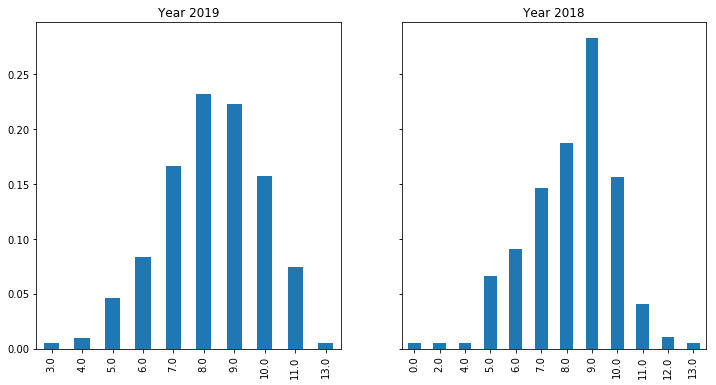

In [16]:
fig, axes = plt.subplots(1,2,sharey = 'row')
fig.set_size_inches(12,6)
d19.risetime.value_counts(normalize = True).sort_index().plot('bar',ax = axes[0], title = 'Year 2019')
d18.risetime.value_counts(normalize = True).sort_index().plot('bar', ax = axes[1], title = 'Year 2018' )

In [237]:
def plotmulti(df1, df2,label1, label2):
    ds1 = df1.risetime
    ds2 = df2.risetime
    fig, ax = plt.subplots()
    width = 0.4
    m1,s1 = ds1.mean(),ds1.std()
    m2,s2 = ds2.mean(), ds2.std()
    fig.set_size_inches(16,8)
    d1 = ds1.value_counts(normalize = True).sort_index().reset_index()
    d1.columns = ['risetime','A']
    d2 = ds2.value_counts(normalize = True).sort_index().reset_index()
    d2.columns = ['risetime','B']
    d1.merge(d2).plot(ax = ax, kind = 'bar', x = 'risetime', y = ['A','B'], width = 0.8, colors = ['r','b'])
    fig.suptitle(f'Daily Risetime Comparison - {label1} vs {label2}', fontsize = 36)
    ax.set_ylabel('Rising frequency (Normalized)', fontsize = 20)
    ax.set_xlabel('Hour of day', fontsize = 20)
    props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.75)
    textstr1 = '\n'.join((
    label1,
    r'$\mu=%.2f$' % (m1, ),
    r'$\sigma=%.2f$' % (s1, )))
    
    textstr2 = '\n'.join((
    label2,
    r'$\mu=%.2f$' % (m2, ),
    r'$\sigma=%.2f$' % (s2, )))
    ax.text(0.05, 0.80, textstr1,transform = ax.transAxes, fontsize = 20, bbox = props)
    ax.text(0.05, 0.60, textstr2,transform = ax.transAxes, fontsize = 20, bbox = props)
    ax.legend([label1, label2],loc = 'best', fontsize = 25)
    plt.savefig(f'./DreamImages/{label1}vs{label2}.jpeg')

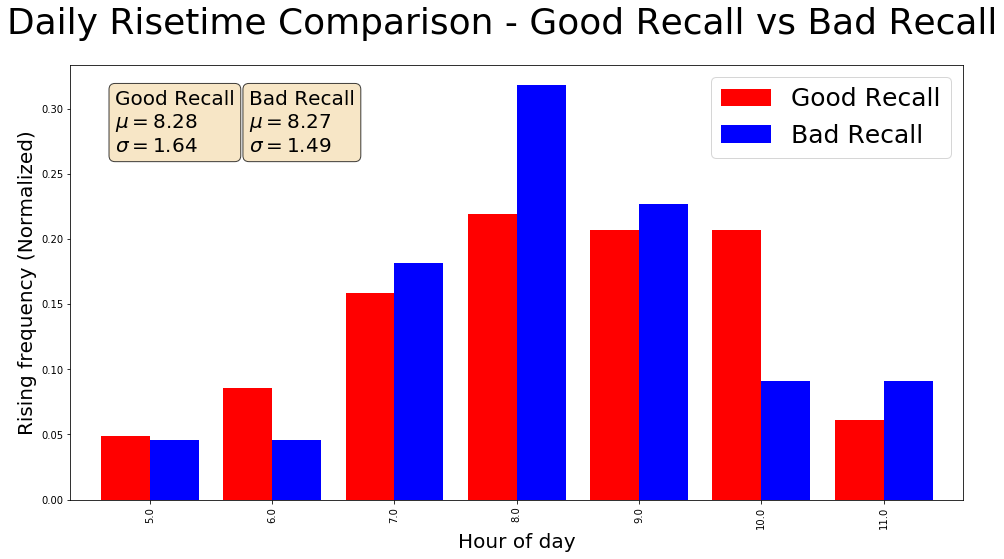

In [175]:
plotmulti(gd,bd, 'Good Recall', 'Bad Recall')

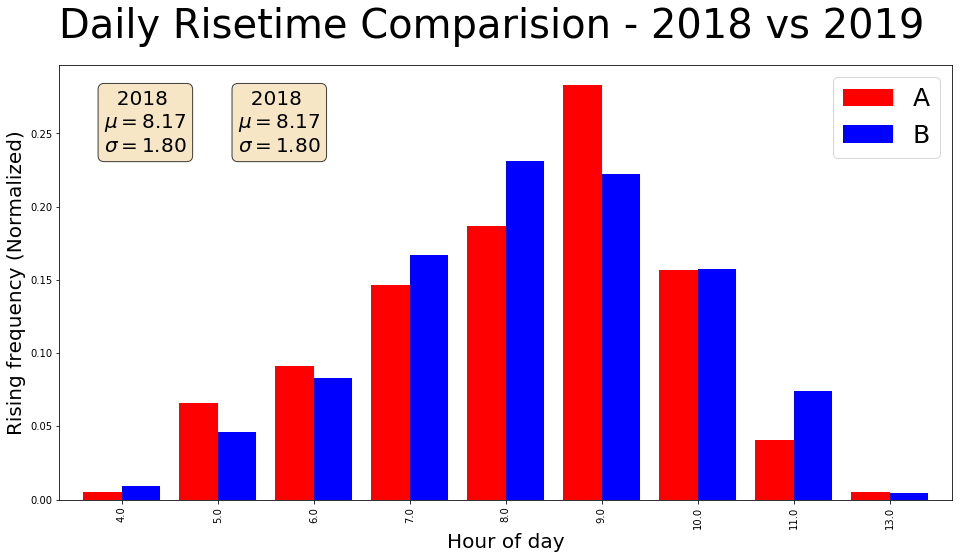

In [132]:
fig, ax = plt.subplots()
width = 0.4
fig.set_size_inches(16,8)
mu, sigma = d18.risetime.mean(), d18.risetime.std()
har18 = d18.risetime.value_counts(normalize = True).sort_index().reset_index()
har18.columns = ['risetime','counts18']
har19 = d19.risetime.value_counts(normalize = True).sort_index().reset_index()
har19.columns = ['risetime','counts19']
har19.merge(har18).plot(ax = ax,kind = 'bar', x = 'risetime', y = ['counts18', 'counts19'], width = 0.8,colors = ['r','b'])
fig.suptitle('Daily Risetime Comparision - 2018 vs 2019', fontsize = 40)
ax.set_ylabel('Rising frequency (Normalized)', fontsize = 20)
ax.set_xlabel('Hour of day', fontsize = 20)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.75)
textstr = '\n'.join((
    r'  2018  ',
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))
ax.text(0.05, 0.80, textstr,transform = ax.transAxes, fontsize = 20, bbox = props)
ax.text(0.20, 0.80, textstr,transform = ax.transAxes, fontsize = 20, bbox = props)
ax.legend(['A','B'],loc = 'best', fontsize = 25)
plt.savefig('./DreamImages/2018v2019.jpeg')


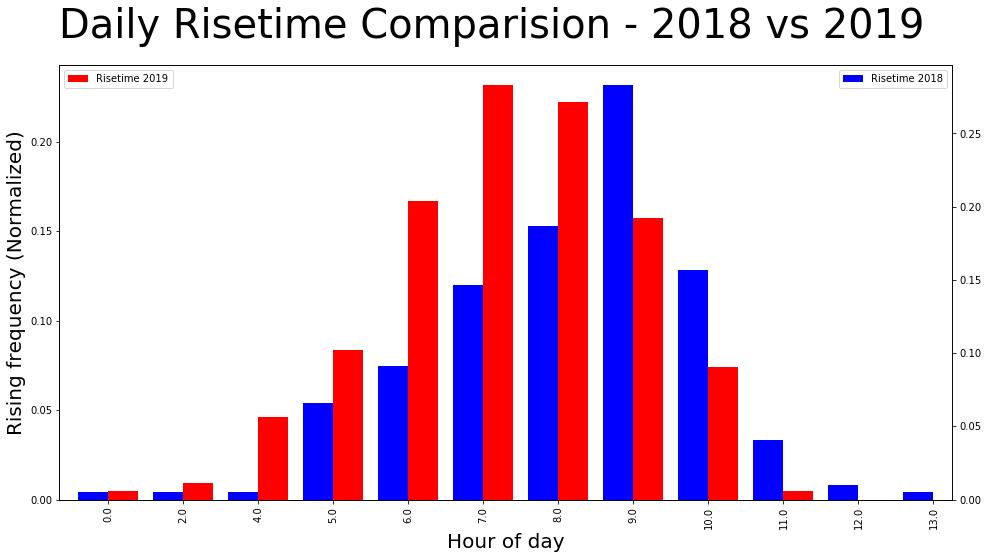

In [19]:
fig, ax = plt.subplots()
width = 0.4
fig.set_size_inches(16,8)
d19.risetime.value_counts(normalize = True).sort_index().plot(label = 'Risetime 2019',kind = 'bar',ax = ax,color = 'Red',position = 0, width = width)
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
d18.risetime.value_counts(normalize = True).sort_index().plot(label = 'Risetime 2018',kind ='bar', ax = ax2, color = 'Blue',position = 1,width = width )
ax2.legend(loc = 'upper right')
fig.suptitle('Daily Risetime Comparision - 2018 vs 2019', fontsize = 40)
ax.set_ylabel('Rising frequency (Normalized)', fontsize = 20)
ax.set_xlabel('Hour of day', fontsize = 20)
plt.savefig('./DreamImages/2018v2019.jpeg')

In [20]:
gd = d19[d19.dreamlength>400]
bd = d19[d19.dreamlength<50]
ssdisplay(gd.describe().round(decimals = 2),bd.describe().round(decimals = 2))

,risetime,score,dreamlength
count,82.00,82.00,83.00
mean,8.28,2.37,671.72
std,1.64,0.69,275.38
min,4.00,1.00,401.00
25%,7.00,2.00,461.50
50%,8.00,2.00,597.00
75%,10.00,3.00,793.50
max,11.00,4.00,1619.00
,risetime,score,dreamlength
count,22.00,22.00,22.00


In [21]:
b4 = d19[d19.timestamp.dt.month < 8]; a4 = d19[d19.timestamp.dt.month >= 8]

In [22]:
ssdisplay(b4.describe()[1:],a4.describe()[1:])

,risetime,score,dreamlength
mean,8.095238,2.160000,328.728000
std,1.830535,0.733968,260.455072
min,3.000000,1.000000,2.000000
25%,7.000000,2.000000,135.000000
50%,8.000000,2.000000,307.000000
75%,9.000000,3.000000,434.000000
max,13.000000,4.000000,1619.000000
,risetime,score,dreamlength
mean,8.466667,2.188889,448.076923
std,1.375549,0.701434,343.259611


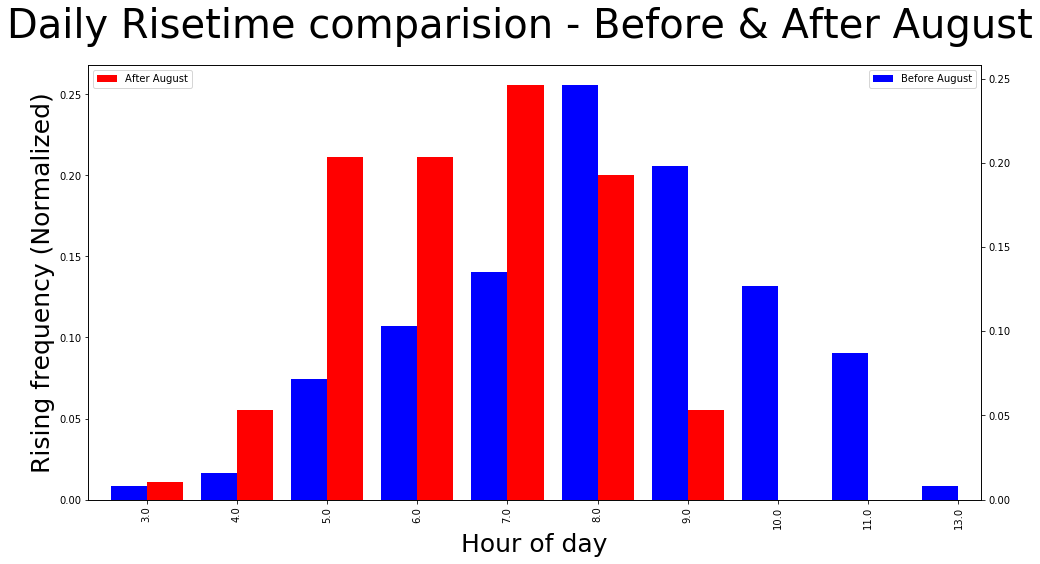

In [25]:
fig, ax = plt.subplots()
width = 0.4
fig.set_size_inches(16,8)
a4.risetime.value_counts(normalize = True).sort_index().plot(label = 'After August',kind = 'bar',ax = ax,color = 'Red',position = 0, width = width)
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
b4.risetime.value_counts(normalize = True).sort_index().plot(label = 'Before August',kind ='bar', ax = ax2, color = 'Blue',position = 1,width = width )
ax2.legend(loc = 'upper right')
fig.suptitle('Daily Risetime comparision - Before & After August', fontsize = 40)
ax.set_ylabel('Rising frequency (Normalized)', fontsize = 25)
ax.set_xlabel('Hour of day', fontsize = 25)
plt.savefig('./DreamImages/2019b4a4.jpeg')

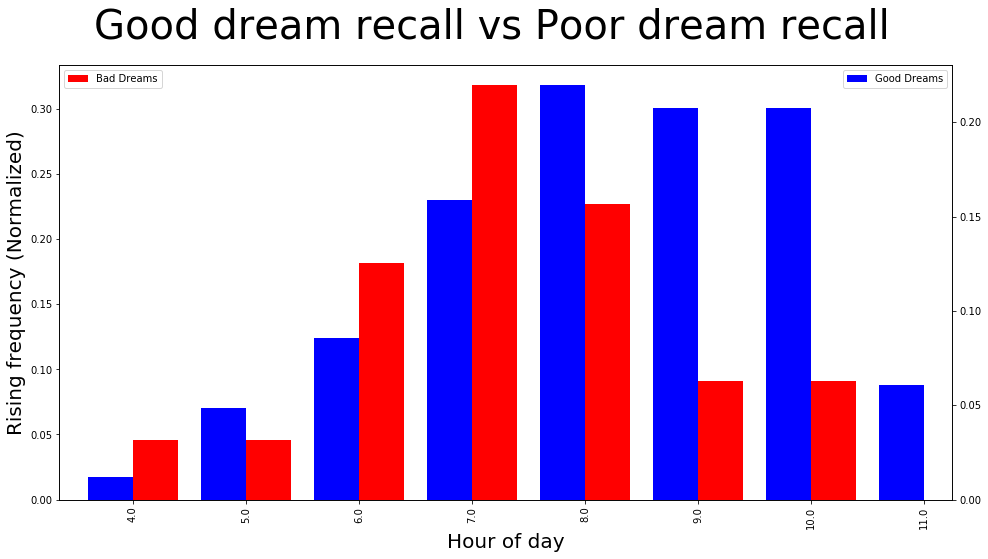

In [28]:
fig, ax = plt.subplots()
width = 0.4
fig.set_size_inches(16,8)
bd.risetime.value_counts(normalize = True).sort_index().plot(label = 'Bad Dreams',kind = 'bar',ax = ax,color = 'Red',position = 0, width = width)
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
gd.risetime.value_counts(normalize = True).sort_index().plot(label = 'Good Dreams',kind ='bar', ax = ax2, color = 'Blue',position = 1,width = width )
ax2.legend(loc = 'upper right')
fig.suptitle('Good dream recall vs Poor dream recall', fontsize = 40)
ax.set_ylabel('Rising frequency (Normalized)', fontsize = 20)
ax.set_xlabel('Hour of day', fontsize = 20)
plt.savefig('./DreamImages/GoodDreamsvBadDreams.jpeg')

In [176]:
import seaborn as sns

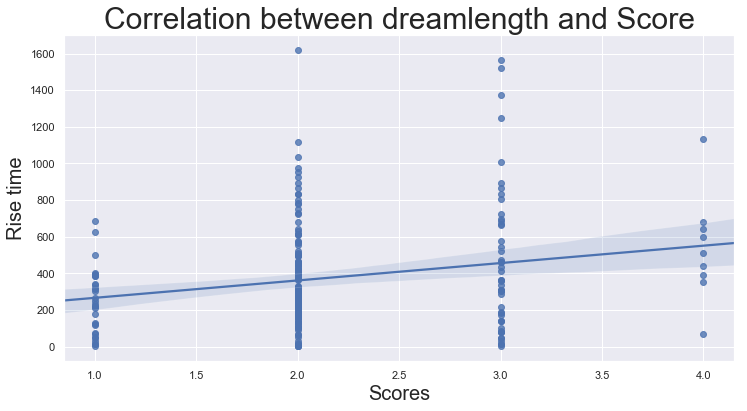

In [223]:
sns.set(rc = {'figure.figsize' : (12,6)})
ax = sns_corr = sns.regplot(x = 'score', y= 'dreamlength', data = d19)
fig = sns_corr.get_figure()
plt.title('Correlation between dreamlength and Score', fontsize = 30)
ax.set_xlabel('Scores', fontsize = 20)
ax.set_ylabel('Rise time', fontsize = 20)
fig.savefig('correlation.jpeg')

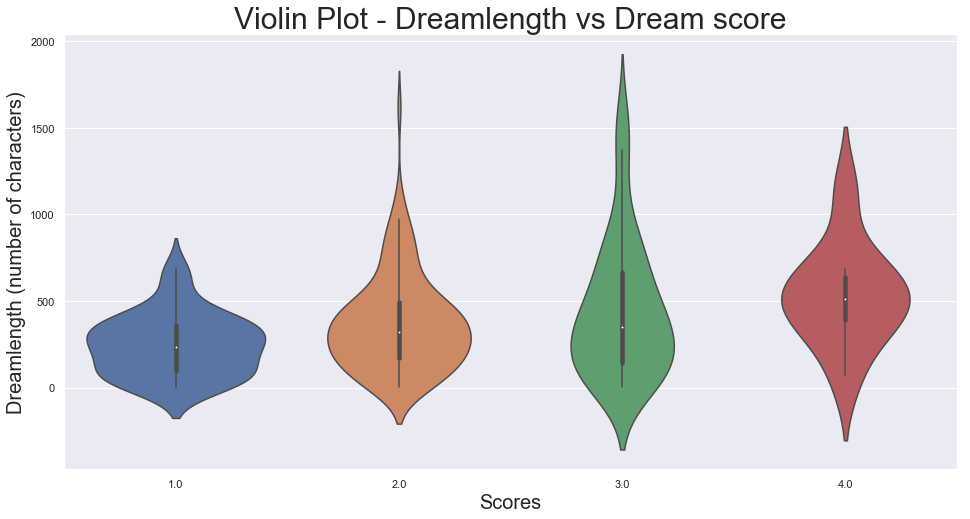

In [239]:
sns.set(rc = {'figure.figsize' : (16,8)})
ax = sns.violinplot(x = 'score', y= 'dreamlength', data = d19)
plt.title('Violin Plot - Dreamlength vs Dream score', fontsize = 30)
ax.set_xlabel('Scores', fontsize = 20)
ax.set_ylabel('Dreamlength (number of characters)', fontsize = 20)
plt.savefig('ViolinPlotGDBD.jpeg')

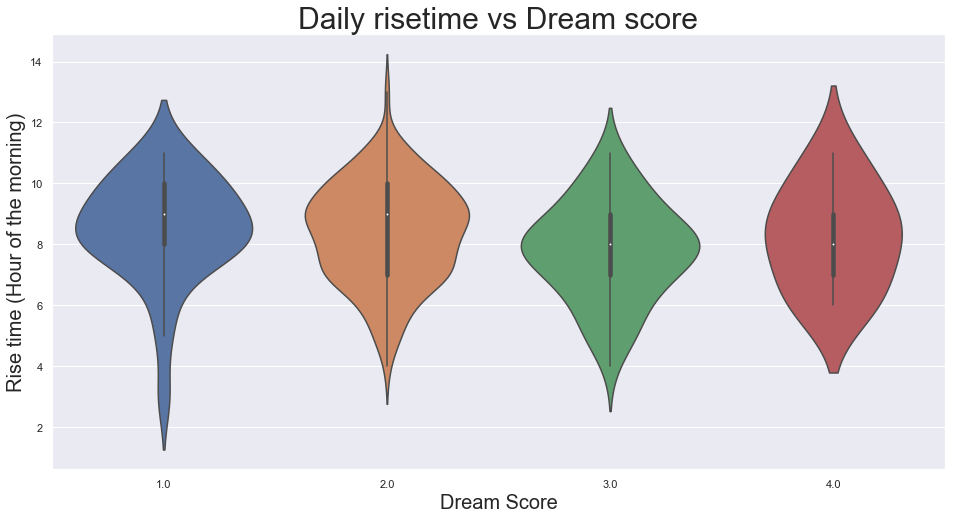

In [240]:
ax = sns.violinplot(x = 'score', y= 'risetime', data = d19)
plt.title('Daily risetime vs Dream score', fontsize = 30)
ax.set_xlabel('Dream Score', fontsize = 20)
ax.set_ylabel('Rise time (Hour of the morning)', fontsize = 20)
plt.savefig('RisetimeVsScore.jpeg')

In [179]:
from collections import defaultdict
dftype = defaultdict(list)
girlfriends,friends,places,family,workplace = ['gf','fr','p','fm','w']

In [180]:
dftype[girlfriends] = ['chantal','nikita','dhoot','shruti','mansi','krati'];
dftype[friends] = ['enoch','tushar','amith','aannesha','sanjukta','rahul','ruchi','manisha'];
dftype[places] = ['cisco','bits','holy'];
dftype[family] = ['mom','dad','jyoti','gurmeet'];
dftype[workplace] = ['Kannan','raghu','satya','vikas','jill','ilham','lavanya','ligy'];

In [181]:
dfs = defaultdict(list)
for k in dftype.keys():
    dfs[k] = d19[d19.dream.str.contains('|'.join(dftype[k]),case = False, na = False)].describe().round(decimals = 2)    

In [182]:
print(dfs.keys())
ssdisplay(*list(dfs.values()))

dict_keys(['gf', 'fr', 'p', 'fm', 'w'])


,risetime,score,dreamlength
count,17.00,17.00,17.00
mean,7.88,2.18,541.88
std,1.96,0.88,407.19
min,4.00,1.00,84.00
25%,7.00,2.00,268.00
50%,8.00,2.00,405.00
75%,9.00,3.00,803.00
max,11.00,4.00,1619.00
,risetime,score,dreamlength
count,32.00,31.00,32.00


In [183]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.tree import Tree

In [184]:
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

In [185]:
def process_content(sentences):
    #What is the type of sentences? It should be a list
    named_entity = []
#    wordlist, wordtags = [],[]
    try:
        for sent in sentences:
            neb = namedentities(sent)
            for n in neb:
                named_entity.append(n)
            
#            for word in nltk.word_tokenize(sent):
#                wordlist.append(word)
#                wordtags.append(nltk.pos_tag([word])[0])
        return named_entity
            
    
    except Exception as e:
        print(str(e))

In [186]:
def namedentities(sent):
    # A sentence goes on, output is all the named entities in the sentence
    chunklist, current_chunk = [],[]
    
    #need words and word tags i.e word tokenize and ne
    wordlist =  nltk.word_tokenize(sent)
    wordtags = nltk.pos_tag(wordlist)
# Changing the above function to directly incorporate wordtags
#Update 2: Will change the above function process_contents to incorparate this function as-is
    
    chunks = nltk.ne_chunk(wordtags,binary = True)

    for i in chunks:
        if type(i) == Tree:
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in chunklist:
                chunklist.append(named_entity)
                current_chunk = []
                
    if current_chunk:
        named_entity = " ".join(current_chunk)
        if named_entity not in chunklist:
            chunklist.append(named_entity)
            current_chunk = []
            
    return chunklist
    
    #functions that go through all named entitites in the tree, and add them to a collection
    

In [187]:
dream_sentences = []
for row in d19.itertuples():
    if isinstance(row.dream,str) and len(row.dream) > 30:
        tokenized = sent_tokenize(row.dream)
        for sent in tokenized:
            dream_sentences.append(sent)

In [188]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import sent_tokenize, word_tokenize

In [189]:
all_words = [w.lower() for w in movie_reviews.words()]

In [190]:
all_words = nltk.FreqDist(all_words)

In [191]:
word_features = list(all_words.keys())[:3000]

In [192]:
def dream2tokens(dreamsent):
    
    sent_tokens = sent_tokenize(dreamsent)
    wordtokens = []
    for s in sent_tokens:
        for w in word_tokenize(s):
            wordtokens.append(w)
    return wordtokens

In [193]:
def prepros(wordtokens):
    words = set(wordtokens)
    #Input is the dream, output should be a feature set
#    featureset = {w: (w in wordtokens) for w in word_features}
    featureset = {}
    for w in word_features:
        featureset[w] = (w in words)
    return featureset

In [194]:
import pickle
with open('naivebayes.pickle','rb') as f:
    classifier = pickle.load(f)

In [208]:
def dreamreview(dreamstring):
    tokens = dream2tokens(dreamstring)
    featureset = prepros(tokens)
    pd = classifier.prob_classify(featureset)
    if pd.prob('neg') > 0.9:
        return 'neg'
    else:
        return 'pos'
    # run through labels I'll get the probability
    #I want to return 

In [196]:
classifier.prob_classify

<bound method NaiveBayesClassifier.prob_classify of <nltk.classify.naivebayes.NaiveBayesClassifier object at 0x1a317d7310>>

In [197]:
from nltk.corpus import stopwords

In [198]:
len(stopwords.words('english'))

179

In [199]:
from collections import Counter
counts = Counter(wordlist)
sortedwordlist = sorted(wordlist,key = counts.get, reverse = True);

NameError: name 'wordlist' is not defined

In [ ]:
wordspace = set(sortedwordlist)

In [ ]:
wordfrequency = defaultdict(int)

In [ ]:
for word in wordlist:
    wordfrequency[word] += 1

In [ ]:
wrd = {k:v for k,v in sorted(wordfrequency.items(),key= lambda item: item[1], reverse = True)}

In [ ]:
topwrds = defaultdict(int)
for k,v in wrd.items():
    if wrd[k] > 30:
        topwrds[k] = v

In [ ]:
plt.plot(list(topwrds.keys(),list(topwrds.values())

NLTK - Basics - Weekday & Weekend

In [66]:
df = a4weekend.risetime.value_counts(normalize = True).sort_index(); df

6.0     0.096774
7.0     0.129032
8.0     0.258065
9.0     0.193548
10.0    0.258065
11.0    0.064516
Name: risetime, dtype: float64

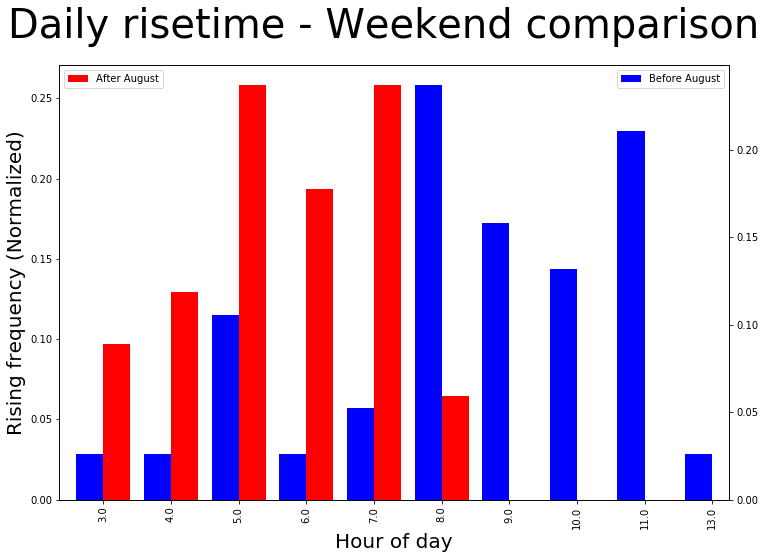

In [64]:
fig, ax = plt.subplots()
width = 0.4
fig.set_size_inches(12,8)
df.plot(label = 'After August',kind = 'bar',ax = ax,color = 'Red',position = 0, width = width)
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
b4weekend.risetime.value_counts(normalize = True).sort_index().plot(label = 'Before August',kind ='bar', ax = ax2 , color = 'Blue',position = 1,width = width )
ax2.legend(loc = 'upper right')
fig.suptitle('Daily risetime - Weekend comparison',fontsize = 40)
ax.set_ylabel('Rising frequency (Normalized)', fontsize = 20)
ax.set_xlabel('Hour of day', fontsize = 20)
plt.savefig('weekndcompare.jpeg')

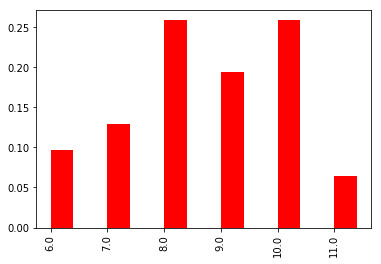

In [52]:
a4weekend.risetime.value_counts(normalize = True).sort_index().plot(label = 'After August',kind = 'bar',color = 'Red',position = 0, width = width)

In [ ]:
fig, ax = plt.subplots()
width = 0.4
fig.set_size_inches(16,8)
a4weekday.risetime.value_counts(normalize = True).sort_index().plot(label = 'After',kind = 'bar',ax = ax,color = 'Red',position = 0, width = width)
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
b4weekday.risetime.value_counts(normalize = True).sort_index().plot(label = 'Before',kind ='bar', ax = ax2, color = 'Blue',position = 1,width = width )
ax2.legend(loc = 'upper right')

In [207]:
properdreams = d19[d19.dreamlength > 40]; properdreams.head()

,timestamp,b4bool,risetime,score,dream,dreamlength
290,2019-01-03 22:52:57,Yes,6.0,3.0,There was some comparison of grasping powers.,46.0
291,2019-01-04 09:46:00,No,9.0,1.0,"There was Krati Tripathi in the dream, I was t...",222.0
292,2019-01-05 08:05:30,No,8.0,3.0,"I moved in new place. Before that, I met all c...",142.0
293,2019-01-09 07:56:11,No,7.0,3.0,A scene involved green lantern(black) going ro...,413.0
294,2019-01-10 07:35:41,No,7.0,3.0,I was trying to get out of Byraveshwara apartm...,831.0


In [235]:
properdreams['dreamrev'] = properdreams.dream.apply(dreamreview)

/Users/hargunoberoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
properdreams.head()

,timestamp,b4bool,risetime,score,dream,dreamlength,dreamrev
290,2019-01-03 22:52:57,Yes,6.0,3.0,There was some comparison of grasping powers.,46.0,neg
291,2019-01-04 09:46:00,No,9.0,1.0,"There was Krati Tripathi in the dream, I was t...",222.0,neg
292,2019-01-05 08:05:30,No,8.0,3.0,"I moved in new place. Before that, I met all c...",142.0,neg
293,2019-01-09 07:56:11,No,7.0,3.0,A scene involved green lantern(black) going ro...,413.0,neg
294,2019-01-10 07:35:41,No,7.0,3.0,I was trying to get out of Byraveshwara apartm...,831.0,neg


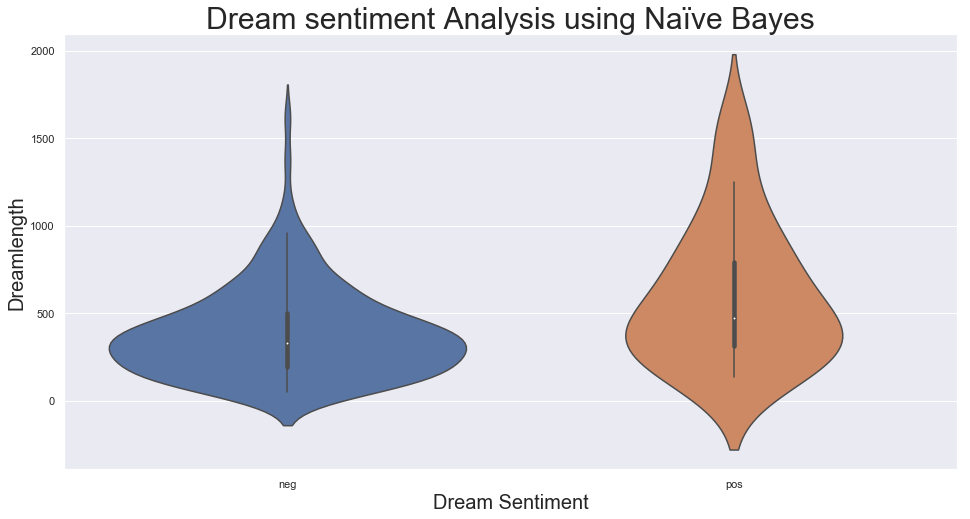

In [241]:
ax = sns.violinplot(x = 'dreamrev', y= 'dreamlength', data = properdreams)
ax.set_title('Dream sentiment Analysis using Naïve Bayes', fontsize = 30)
ax.set_xlabel('Dream Sentiment', fontsize = 20)
ax.set_ylabel('Dreamlength', fontsize = 20)
plt.savefig('DreamReview.jpeg')

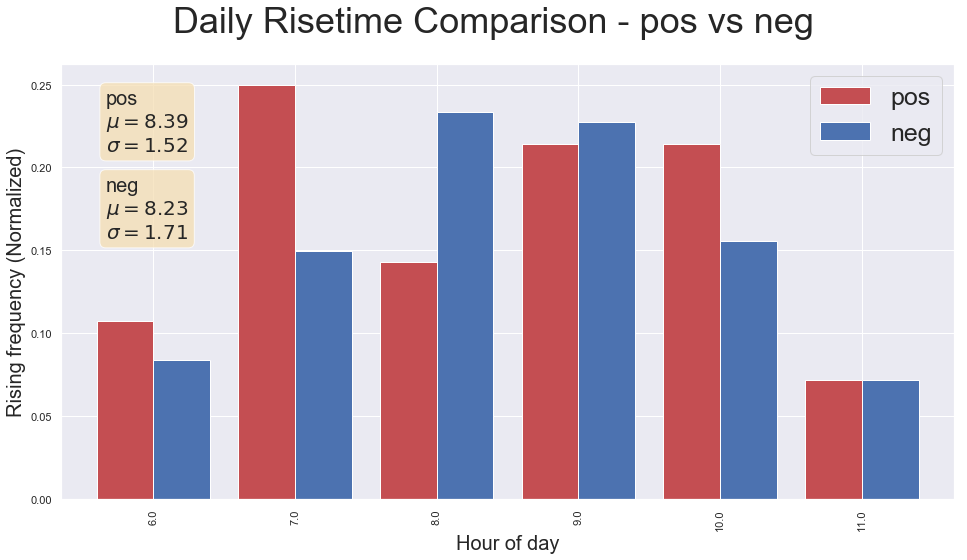

In [238]:
plotmulti(properdreams[properdreams.dreamrev == 'pos'], properdreams[properdreams.dreamrev =='neg'],'pos','neg')

In [ ]:
#function for all words
all_words = []
for row in d19.itertuples():
    if isinstance(row.dream, str):
    wordtoks = word_tokenize(row.dream)
    for w in wordtoks:
        if isinstance(w, str) and len(w)>2:
            all_words.append(w)

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
filtered_words = []
for w in all_words:
    if w not in stop_words:
        filtered_words.append(w)

In [ ]:
freq_filtered_words = nltk.FreqDist(filtered_words);

In [ ]:
freq_filtered_words.plot(30, cumulative = False)

In [ ]:
freq_filtered_words_dict = dict(freq_filtered_words)

In [ ]:
freqq = nltk.FreqDist(freq_filtered_words_dict)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopstop = set(STOPWORDS)

In [ ]:
gentext = " ".join(freq_filtered_words)

In [ ]:
cloudy = WordCloud(width = 1000, height = 500, background_color= 'white', stopwords= stopstop,min_font_size=10).generate_from_frequencies(freq_filtered_words)

In [ ]:
plt.figure(figsize=(20,10));
plt.imshow(cloudy, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('dreamcloud.jpeg')